# TP Analyse scenarios IMACLIM-R - 26/10/23

Pré-requis: 
- un environnement python avec les modules demandés installés, la possibilité de travailler avec des notebook (par exemple Jupyter Lab https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html, conseil : https://github.com/lckr/jupyterlab-variableInspector pour visualiser les variables)
- le dossier data (qui contient les données) dans le répertoire de travail


Vous allez analyser des résultats de scénarios issus du modèle Imaclim-R monde (http://themasites.pbl.nl/models/advance/index.php/Model_Documentation_-_IMACLIM).


Le document « ensemble scenarios ImaclimR.pdf » décrit comment un ensemble de scénarios de « baseline », i.e. sans politique climatique, a été obtenu. La base de données de scénarios est enrichie de scénarios « d’atténuation », i.e. avec un objectif de réduction des émissions de gaz à effet de serre ; un scénario d’atténuation par baseline.
Les résultats correspondants à l’ensemble de ces scénarios en termes d’émissions de CO2 (ECO2_w.csv), de PIB (GDP_w.csv) et de PIB par habitant (GDPcap_w.csv), d’intensité énergétique du PIB (EI_w.csv) et d’intensité carbone de l’énergie (CI_w.csv), à l’échelle mondiale sur la période 2015-2065, sont fournis dans le dossier /data.

Ce dossier contient également les trajectoires de population mondiale, exogène, de l’ensemble des scénarios (Pop_w.csv). Tous les résultats sont donnés en indice par rapport à la valeur 2015. La première ligne donne les années dans les fichiers de résultats. Chaque ligne suivante correspond à un scenario de la base de données de scénarios. Par ailleurs, le dossier contient également un fichier drivers.csv qui donne la combinaison des groupes de paramètres correspondant à chaque scénario (voir le fichier readme.txt pour une explication des indices du fichier drivers.csv). Dans tous les fichiers csv les scénarios sont classés dans le même ordre. 


Commencez par lire les différents documents, et par ouvrir les fichiers csv pour comprendre comment les données sont organisées.


Vous allez créer et utiliser un code python3 pour lire les données de résultats, et les analyser en traçant un certain nombre de graphiques. Le rendu du TP sera à la fois le code lui-même, et ce fichier dans lequel vous aurez copié vos graphiques et rédigé vos analyses. Vous êtes cependant libre sur le format final du rendu (codé commenté + document word/pdf, notebook...).


In [1]:
# librairies
import csv, os #lecture ecriture de csv; os management
import numpy as np #traitement de matrice de type numpy array
import matplotlib.pyplot as plt #librairy graphique
#ANOVA: fin du TD (optionnel)
from pandas import DataFrame,read_csv,concat,notnull
import pandas as pd



## **A. Baselise analysis**

Description des variables (en base 1 de 2015)

|  Name |   Description  |
|---|---|
| eco2  | CO2 emissions  |
|  pop | World population   |
|  gdp_per_cap | GDP per capita  |
| gdp  | GDP |
| ei  | Energy intensity of GDP|
| ci | Carbon intensity of energy |

In [2]:
#Reading data

path_data='data/'
#starts at line 1 instead of zero because the line zero contains dates
eco2= np.array([line for line in csv.reader(open(path_data+'ECO2_w.csv','r'))][1:],dtype=float)#global CO2 emissions

pop= np.array([line for line in csv.reader(open(path_data+'Pop_w.csv','r'))][1:],dtype=float)#world population

gdp_per_cap= np.array([line for line in csv.reader(open(path_data+'GDPcap_w.csv','r'))][1:],dtype=float)#global per capita GDP

gdp= np.array([line for line in csv.reader(open(path_data+'GDP_w.csv','r'))][1:],dtype=float)#global GDP

ei= np.array([line for line in csv.reader(open(path_data+'EI_w.csv','r'))][1:],dtype=float)#energy intensity of GDP

ci= np.array([line for line in csv.reader(open(path_data+'CI_w.csv','r'))][1:],dtype=float)#carbon intensity of total primary energy supply

# alternative pour charger les données
#eco2 = np.genfromtxt( path_data+'ECO2_w.csv', dtype=None, delimiter=',', skip_header=1)
#eco2 = pd.read_csv( path_data+'ECO2_w.csv', delimiter=',').to_numpy()



In [3]:
# With python dictonnaries
path_data='data/'
data_tp = {}
for fil in [fil for fil in os.listdir(path_data) if '.csv' in fil]: #os.listdir(path_data) renvoie tous les fichiers dans path_data et on ne garde que les .csv
    data_tp[ fil.replace('.csv', '')] = np.array([line for line in csv.reader(open( path_data+fil,'r'))][1:],dtype=float)


In [5]:
# Loading years and the drivers' names
# # over 2015-2100 years
years = np.array([line for line in csv.reader(open('data/Pop_w.csv','r'))][0],dtype=float) #line zero zero
# drivers of the scenarios
drivers= np.array([line for line in csv.reader(open('data/drivers.csv','r'))][1:],dtype=float)#values of the alternative groups of parameters
drivers_names=np.array([line for line in csv.reader(open('data/drivers.csv','r'))][0],dtype=str)#names of the groups of parameters
###########################

# create output folder
output_path = 'figures/'
if not os.path.isdir(output_path):
    os.mkdir(output_path)


**Baseline description**:
Check the data/readme.txt file and pick a baselineline and describe it here.


In [8]:
#Choose a baseline (other than 2, the default value)
base_nb = 77 #77
ind_base = base_nb-1
print(drivers[ind_base,:])

[0. 1. 1. 2. 1. 2. 0. 0.]


### *A.1. Plot - CO2 emissions*
**Plot the global emissions over 2015-2065**. You could use some help of the pyplot documentation (https://matplotlib.org/)!

**How would you convert these emissions into global mean temperature increase?**.


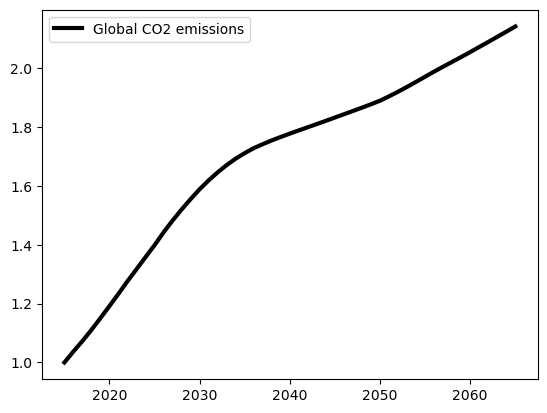

In [9]:
### Fig. 1 ###
# plot the global emissions over 2015-265
plt.figure()
plt.plot(years,np.transpose(eco2[ind_base,:]),color="k", linewidth=3, label="Global CO2 emissions")
plt.legend(loc=0)
plt.show()  
#to save it:
#plt.savefig( "ma_super_figure.pdf")
###########################


In [10]:
#  Global mean temperature
Emi_2015_Gtco2 = 35.2 # historical emissions in GTCO2
def TCRE_Matthews_et_al( Emi_first_yr_Gtco2, Emi_evolution):
    Gt_2_Tt = 1e-3
    C_2_CO2 = 3.7
    Emi_cum= Emi_first_yr_Gtco2 / C_2_CO2 * Gt_2_Tt * Emi_evolution.sum()
    return [dT*Emi_cum for dT in [0.8,1.35,2.4]]


print(TCRE_Matthews_et_al( Emi_2015_Gtco2 ,data_tp['ECO2_w'][base_nb-1,:]))


[0.6585752358267131, 1.1113457104575784, 1.9757257074801389]


**Comments**: 

### *A. 2. Kaya identity*

As you may know, global CO2 emissions can be broken down into a product: *Population * GDP per capita * Energy intensity of GDP * Carbon intensity of GDP*. That's the Kaya identity.

**Plot the evolution of the four Kaya factors and comment, considering your choice of baseline.**

Text(0.5, 1.0, 'Kaya decomposition')

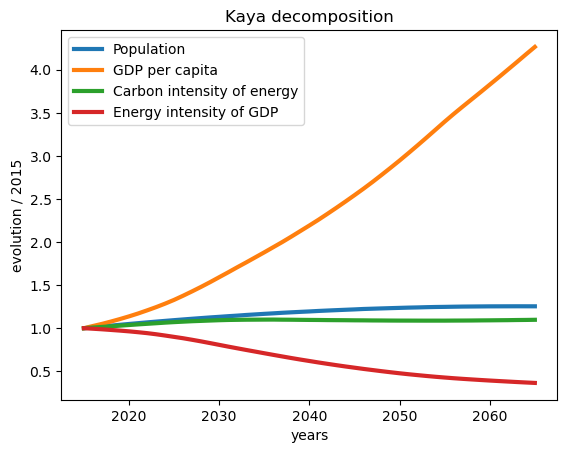

In [11]:
# Kaya identity
dic_legend={'Pop_w': 'Population', 'GDPcap_w': 'GDP per capita', 'CI_w': 'Carbon intensity of energy', 'EI_w': 'Energy intensity of GDP'}
for elt in ['Pop_w', 'GDPcap_w', 'CI_w', 'EI_w']:
    plt.plot(years,np.transpose( data_tp[elt][base_nb-1,:]), linewidth=3, label=dic_legend[elt])
plt.legend(loc=0)

plt.xlabel('years')
plt.ylabel('evolution / 2015')
plt.title('Kaya decomposition')


### *A.3. Carbon intensity and energy intensity phases*

**Plot the energy intensity of GDP (x axis) against the carbon intensity of energy (y axis). Can you identify some phases in the evolution of these two factors? How would you explain this phenomenom?**

Text(0, 0.5, 'Carbon intensity of energy')

<Figure size 640x480 with 0 Axes>

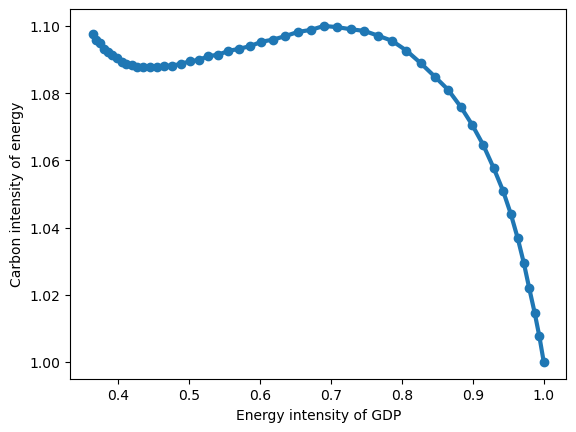

In [12]:
# carbon intensity and energy intensity phases
plt.clf()
plt.figure()
plt.plot( data_tp['EI_w'][base_nb-1,:], data_tp['CI_w'][base_nb-1,:], linewidth=3)
plt.scatter( data_tp['EI_w'][base_nb-1,:], data_tp['CI_w'][base_nb-1,:])


plt.xlabel('Energy intensity of GDP')
plt.ylabel('Carbon intensity of energy')


## **B. Analysis of mitigation scenarios**

You are now going to analyse a mitigation scenario (carbon price) corresponding to your baseline. To do so, add 216 to the baseline number (because there are 216 baseline scenarios in the database)

In [13]:
# climate scenario indices
ind_baseline = base_nb-1
# climat index
ind_climat = ind_base + 216

### *B. 1. Kaya identity*

**Same question as A.2. for the mitigation scenario**

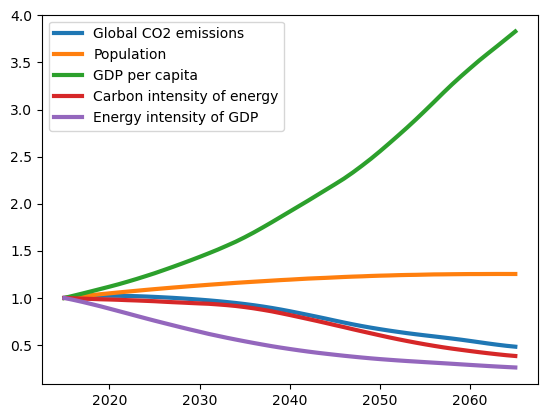

In [14]:
# kaya identidy climate scenario
dic_legend={'ECO2_w': "Global CO2 emissions", 'Pop_w': 'Population', 'GDPcap_w': 'GDP per capita', 'CI_w': 'Carbon intensity of energy', 'EI_w': 'Energy intensity of GDP'}
for elt in ['ECO2_w', 'Pop_w', 'GDPcap_w', 'CI_w', 'EI_w']:
    plt.plot(years,np.transpose( data_tp[elt][ind_climat,:]), linewidth=3, label=dic_legend[elt])
plt.legend(loc=0)


Text(0.5, 1.0, 'Kaya decomposition')

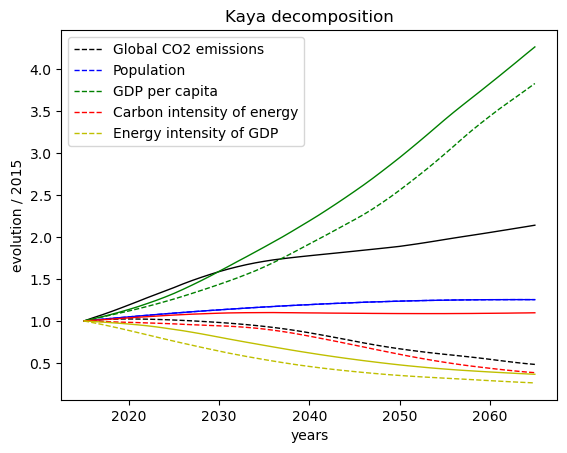

In [15]:
# kaya identidy climate scenario and baseline
dic_legend={'ECO2_w': "Global CO2 emissions", 'Pop_w': 'Population', 'GDPcap_w': 'GDP per capita', 'CI_w': 'Carbon intensity of energy', 'EI_w': 'Energy intensity of GDP'}
dic_color={'ECO2_w': "k", 'Pop_w': 'b', 'GDPcap_w': 'g', 'CI_w': 'r', 'EI_w': 'y'}
for elt in ['ECO2_w', 'Pop_w', 'GDPcap_w', 'CI_w', 'EI_w']:
    plt.plot(years,np.transpose( data_tp[elt][ind_climat,:]), linewidth=1,linestyle='--', label=dic_legend[elt], color =dic_color[elt])
    plt.plot(years,np.transpose( data_tp[elt][ind_baseline,:]), linewidth=1,linestyle='-', color =dic_color[elt])
plt.legend(loc=0)
plt.xlabel('years')
plt.ylabel('evolution / 2015')
plt.title('Kaya decomposition')


### *B.2. GDP: baseline vs mitigation scenario*

You may already observe on the plots that climate policies reduce GDP per capita in IMACLIM-R (or you may not!). **Compute and plot the annual GDP variation (with regard to the baseline) in the mitigation scenario. Convert it into mean annual variations at a 2030/2050/2065 horizon, and comment.**

Text(0.5, 1.0, 'GDP losses')

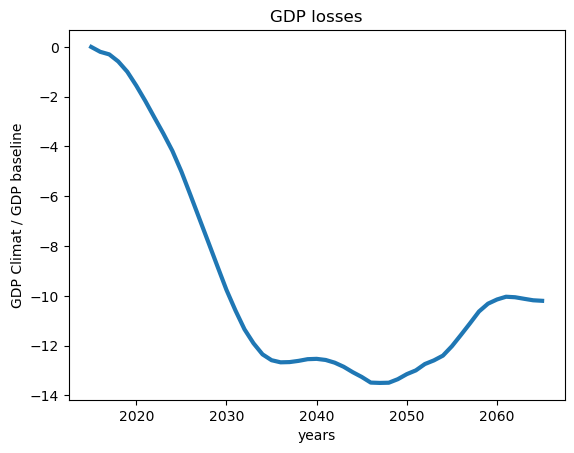

In [16]:
# GDP variations
gdp_variation = (data_tp['GDP_w'][ind_climat,:] / data_tp['GDP_w'][base_nb-1,:] -1) *100


plt.plot(years, gdp_variation, linewidth=3)
plt.xlabel('years')
plt.ylabel('GDP Climat / GDP baseline')
plt.title('GDP losses')


In [18]:
# mean annual variation
def gdp_growth_loss( gdp_ref, gdp_new,ind_year):
    growth_ref = gdp_ref[ind_year] / gdp_ref[0]
    growth_new = gdp_new[ind_year] / gdp_new[0]
    return (growth_ref ** (1/ind_year) - growth_new ** (1/ind_year))*100

print( [ gdp_growth_loss( data_tp['GDP_w'][base_nb-1,:], 
            data_tp['GDP_w'][ind_climat,:], i-2015) for i in [2030,2050,2065]])



[0.7098036299400645, 0.4169594754378503, 0.22225420002848217]


## **C. Analysis of a Scenario set**

Sometimes, scenario analysis deals with a large number of scenarios that need to be compared globally.

### *C.1. Baseline scenario database: cumulated emissions vs mean annual growth plot*

**Compute the cumulated CO2 emissions and the mean annual growth between 2015 and 2065 in the set of baseline scenario and plot the results**. Hint: every scenario should a point on the graph, with the mean annual growth on the x axis and the cumulated CO2 emissions on the y axis.

35.2


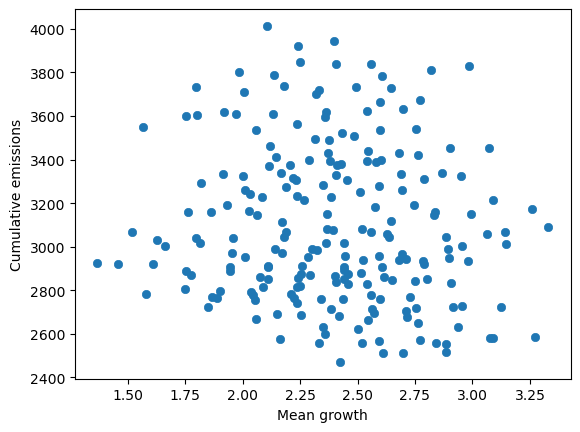

In [19]:
# cumulated emissions vs mean annual growth plot
emi_cum = data_tp['ECO2_w'].sum(axis=1) * Emi_2015_Gtco2


growth_mean = 100 * ( (data_tp['GDPcap_w'][:,-1])**(1./ data_tp['GDPcap_w'].shape[1])
                     -1)

plt.scatter( growth_mean[0:216], emi_cum[0:216], linewidth=0.5)

plt.xlabel('Mean growth')
plt.ylabel('Cumulative emissions')
print(Emi_2015_Gtco2)

### *C.2. Baseline + Mitigation scenario database: mean annual growth*

**Plot on the same histogram the mean annual growth in the baseline vs mitigation scenarios. Comment**. Hint: use the plt.hist function

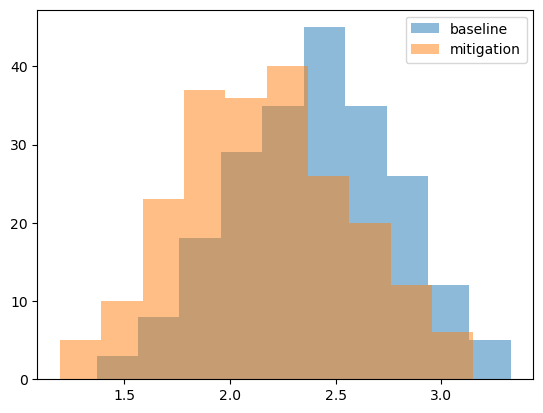

In [20]:
# mean annual growth - histogram

plt.hist(growth_mean[0:216], alpha=0.5,label='baseline')
plt.hist(growth_mean[216:], alpha=0.5,label='mitigation')
plt.legend()




{'whiskers': [<matplotlib.lines.Line2D at 0x7f1e3cb2b810>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1e3c838090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1e3c7ccc10>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1e3c833250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1e3c840a90>,
 'means': []}

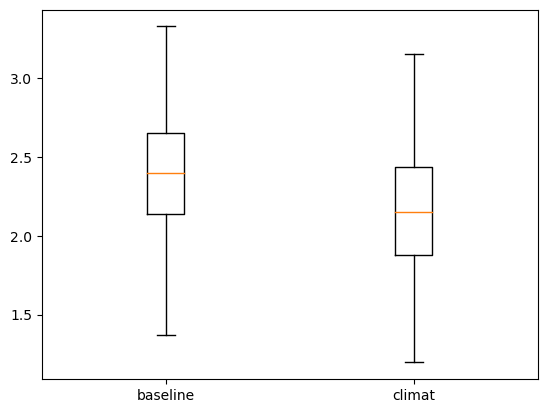

In [21]:
# mean annual growth - boxplot
plt.boxplot( [growth_mean[0:216], growth_mean[216:]], labels=['baseline', 'climat'])

### *C.3. Analysis of variance (ANOVA)* 

**Choose a model's output (CO2 emissions or economic growth) in a scenario subset, either baseline or mitigation. Perform an ANalysis Of VAriance on this scenario subset to analyse the inputs' contribution to the total variance of the results.**.  

Hints:
- you will want to use the anova module https://www.statsmodels.org/dev/examples/notebooks/generated/interactions_anova.html 
- ANOVA consists first of a linear model (Y ~ X with X the set of exogenous drivers)
- then, decompose the total variance (in %) by each regressor's contribution + the interaction of regressors' contribution and plot it